<h2 style="color: #239BA7;">Predict Calorie Expenditure</h2>

<img src="workout.jpg" width="500"/>

<h2 style="color: #239BA7;">Introduction</h2>

The goal of this project is to predict how many calories are burned during a workout.


<h2 style="color: #239BA7;"> Required Libraries</h2>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

<h2 style="color: #239BA7;"> Data Import and Overview</h2>

In [8]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

<h2 style="color: #239BA7;"> Exploratory Data Analysis (EDA)</h2>

In [10]:
train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [11]:
train.tail()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
749995,749995,male,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,749996,female,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,749997,male,60,162.0,67.0,29.0,113.0,40.9,221.0
749998,749998,male,45,182.0,91.0,17.0,102.0,40.3,109.0
749999,749999,female,39,171.0,65.0,19.0,97.0,40.6,103.0


In [12]:
train.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [14]:
train.shape

(750000, 9)

In [15]:
train.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

 <h2 style="color: #239BA7;"> Data Visualization</h2>

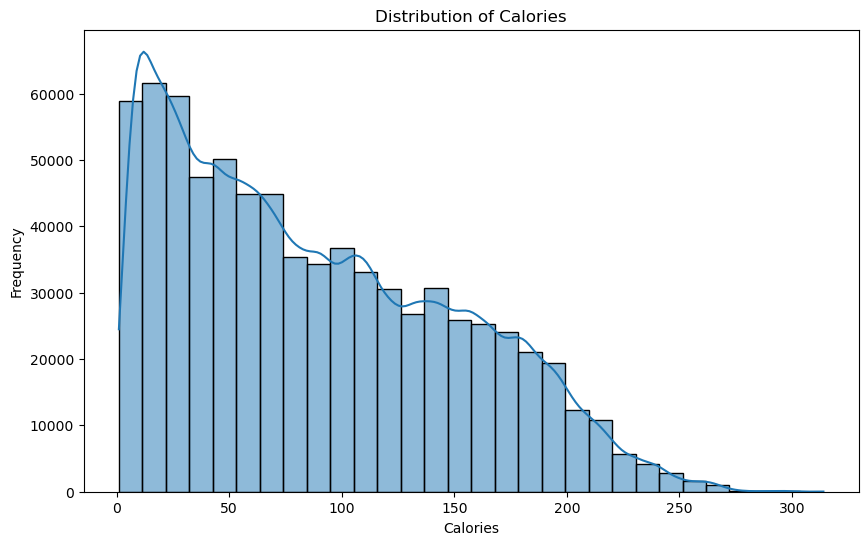

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(train["Calories"], bins=30, kde=True)
plt.title("Distribution of Calories")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()

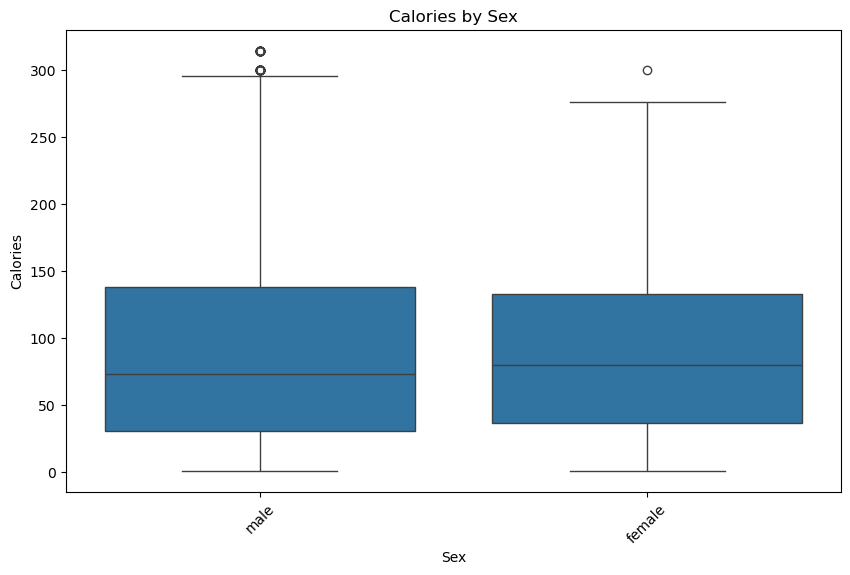

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x="Sex", y="Calories")
plt.title("Calories by Sex")
plt.xlabel("Sex")
plt.ylabel("Calories")
plt.xticks(rotation=45)
plt.show()

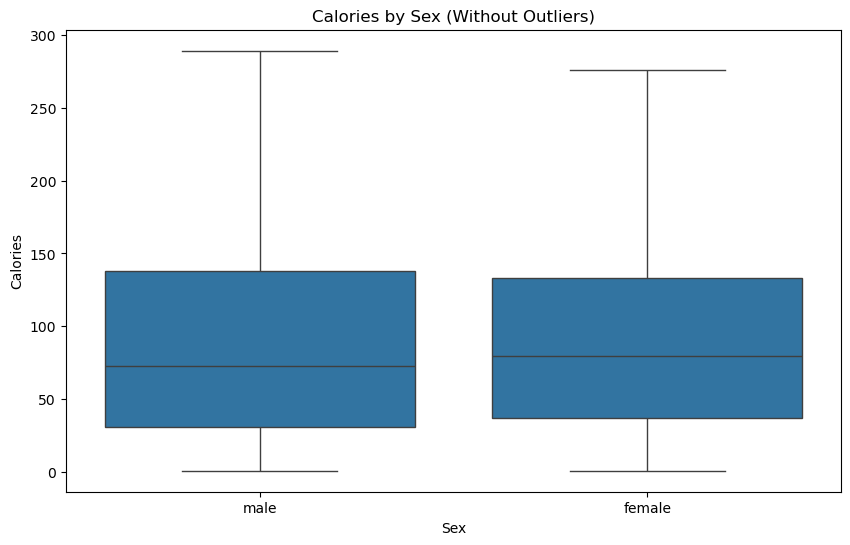

In [19]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = train["Calories"].quantile(0.25)
Q3 = train["Calories"].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define boundaries for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers from the dataset
train_no_outliers = train[(train["Calories"] >= lower_bound) & (train["Calories"] <= upper_bound)]

# Plot a boxplot without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_no_outliers, x="Sex", y="Calories")
plt.title("Calories by Sex (Without Outliers)")
plt.xlabel("Sex")
plt.ylabel("Calories")
plt.show()

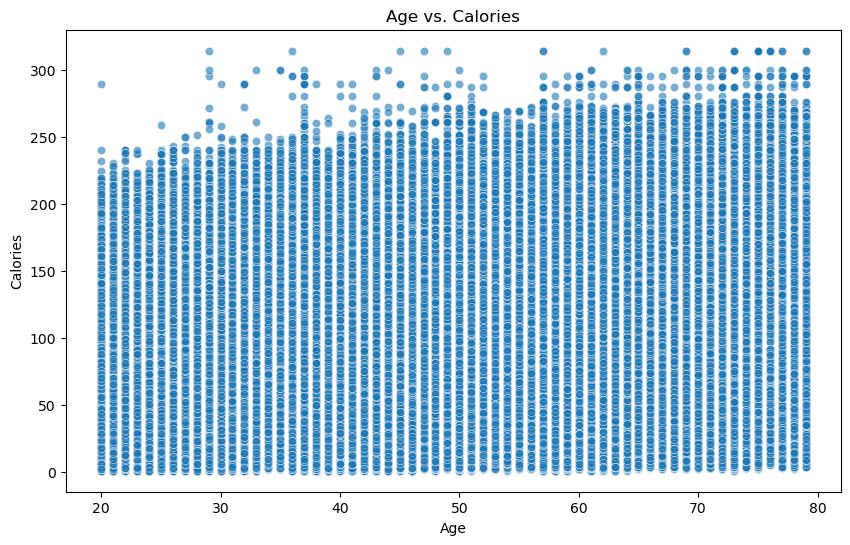

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x="Age", y="Calories", alpha=0.6)
plt.title("Age vs. Calories")
plt.xlabel("Age")
plt.ylabel("Calories")
plt.show()

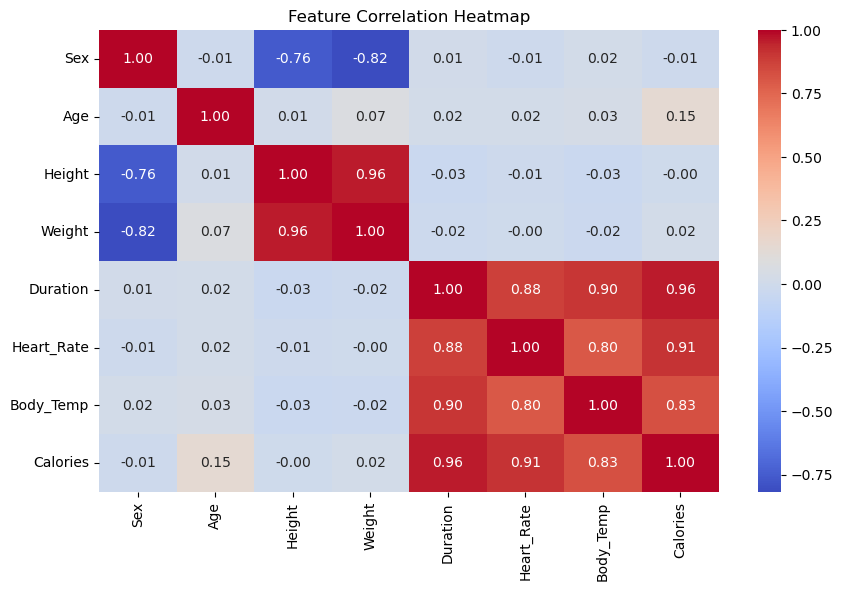

In [21]:
# Convert "Sex" column to numerical values
train_encoded = train.copy()
train_encoded["Sex"] = train_encoded["Sex"].map({"male": 0, "female": 1})


plt.figure(figsize=(10, 6))
corr = train_encoded.drop("id", axis=1).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

<h2 style="color: #239BA7;"> Feature Engineering</h2>

In [23]:
train["Sex"] = train["Sex"].map({"male": 0, "female": 1})

In [24]:
train["BMI"] = train["Weight"] / (train["Height"] / 100) ** 2

In [25]:
train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
0,0,0,36,189.0,82.0,26.0,101.0,41.0,150.0,22.955684
1,1,1,64,163.0,60.0,8.0,85.0,39.7,34.0,22.582709
2,2,1,51,161.0,64.0,7.0,84.0,39.8,29.0,24.690405
3,3,0,20,192.0,90.0,25.0,105.0,40.7,140.0,24.414062
4,4,1,38,166.0,61.0,25.0,102.0,40.6,146.0,22.136740


<h2 style="color: #239BA7;"> Modeling

Step 1: Preparing data...
Data preparation completed.
Step 2: Splitting data...
Train-test split completed.
Step 3: Defining models...
Models initialized.
Step 4: Training and evaluating models...
Training: LinearRegression
Finished: LinearRegression
Training: Ridge
Finished: Ridge
Training: Lasso
Finished: Lasso
Training: ElasticNet
Finished: ElasticNet
Training: ExtraTrees
Finished: ExtraTrees
Training: GradientBoosting
Finished: GradientBoosting
Training: KNeighbors
Finished: KNeighbors
Training: DecisionTree
Finished: DecisionTree
Training: XGBoost
Finished: XGBoost
Training: RandomForest
Finished: RandomForest
Training: LightGBM
Finished: LightGBM

Model Performance:

                        R2       RMSE        MAE
RandomForest      0.996238   3.818412   2.302705
ExtraTrees        0.996184   3.845826   2.321658
XGBoost           0.996053   3.911234   2.465721
LightGBM          0.995672   4.095589   2.585371
DecisionTree      0.992978    5.21685    3.17128
GradientBoosting  0.9918

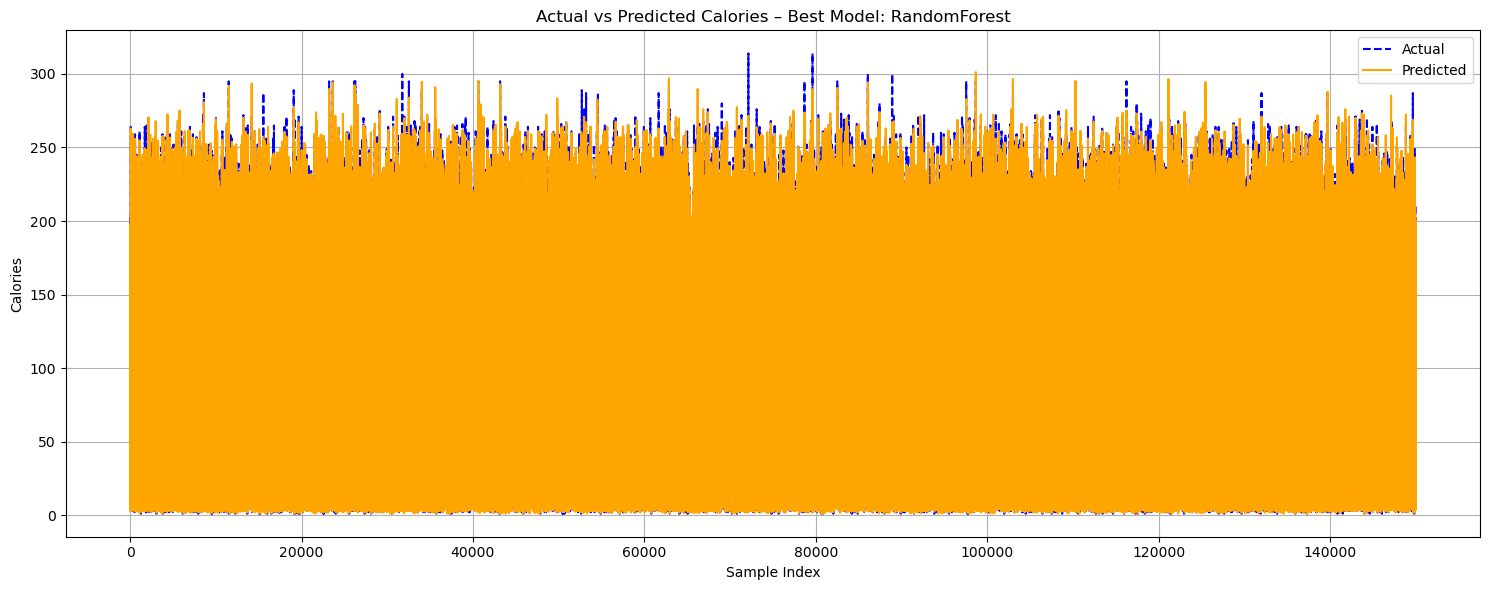


Total runtime: 736.7 seconds


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Start timing
start_time = time.time()

print("Step 1: Preparing data...")

# Separate features and target
X = train.drop("Calories", axis=1)
Y = train["Calories"]

# Convert categorical variables if any
X = pd.get_dummies(X, drop_first=True)

print("Data preparation completed.")

print("Step 2: Splitting data...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
print("Train-test split completed.")

print("Step 3: Defining models...")

models = [
    LinearRegression(), Ridge(), Lasso(), ElasticNet(),
    ExtraTreesRegressor(n_estimators=50, n_jobs=-1, random_state=42),
    GradientBoostingRegressor(n_estimators=50, random_state=42),
    KNeighborsRegressor(n_neighbors=5, n_jobs=-1),
    DecisionTreeRegressor(random_state=42),
    XGBRegressor(n_estimators=50, verbosity=0, n_jobs=-1, random_state=42),
    RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42),
    LGBMRegressor(n_estimators=50, verbose=-1, n_jobs=-1, random_state=42)
]

modelNames = [
    "LinearRegression", "Ridge", "Lasso", "ElasticNet",
    "ExtraTrees", "GradientBoosting", "KNeighbors",
    "DecisionTree", "XGBoost", "RandomForest", "LightGBM"
]

print("Models initialized.")

# Create a dataframe to store results
results = pd.DataFrame(columns=["R2", "RMSE", "MAE"], index=modelNames)

print("Step 4: Training and evaluating models...")

for name, model in zip(modelNames, models):
    print(f"Training: {name}")
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    results.loc[name, "R2"] = r2_score(Y_test, predictions)
    results.loc[name, "RMSE"] = mean_squared_error(Y_test, predictions, squared=False)
    results.loc[name, "MAE"] = mean_absolute_error(Y_test, predictions)
    print(f"Finished: {name}")

print("\nModel Performance:\n")
results_sorted = results.sort_values("R2", ascending=False)
print(results_sorted)

# Plot actual vs predicted for best model
best_model_name = results_sorted.index[0]
best_model = models[modelNames.index(best_model_name)]
Y_pred = best_model.predict(X_test)

plt.figure(figsize=(15, 6))
plt.plot(Y_test.reset_index(drop=True), label="Actual", linestyle="--", color="blue")
plt.plot(pd.Series(Y_pred), label="Predicted", linestyle="-", color="orange")
plt.xlabel("Sample Index")
plt.ylabel("Calories")
plt.title(f"Actual vs Predicted Calories – Best Model: {best_model_name}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print total time
print(f"\nTotal runtime: {round(time.time() - start_time, 2)} seconds")

In [28]:
# Feature Importance from RandomForest
best_model = RandomForestRegressor()
best_model.fit(X_train, Y_train)

RandomForestRegressor()

In [49]:
y_pred = best_model.predict(X_test)

In [50]:
r2 = r2_score(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
mae = mean_absolute_error(Y_test, y_pred)

In [53]:
print(f"Random Forest Performance:")
print(f"R2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

Random Forest Performance:
R2 Score: 0.9963
RMSE: 3.7993
MAE: 2.2885


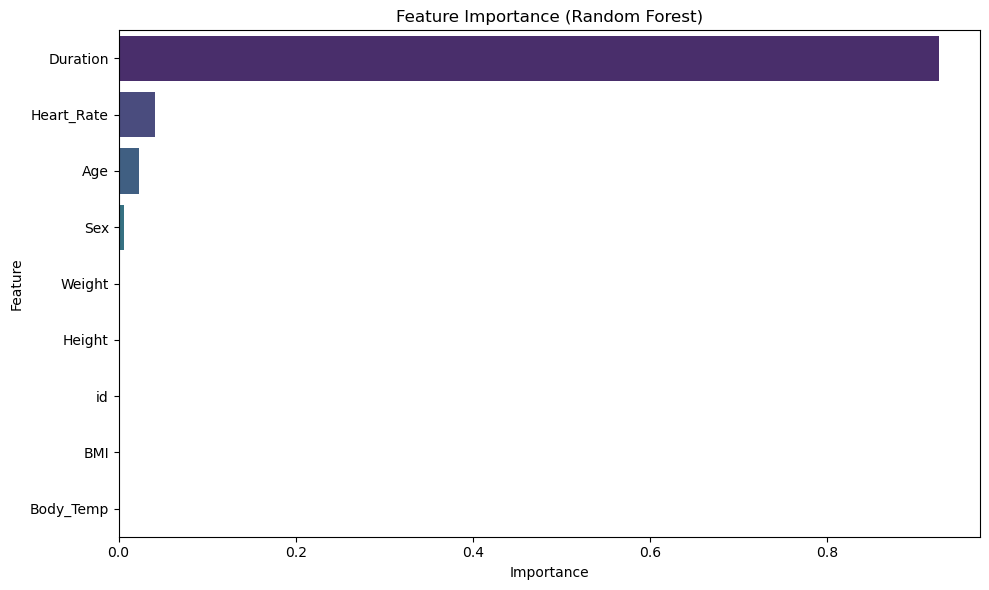

In [29]:
importances = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [55]:
X_test_submission = test.copy()
X_test_submission = pd.get_dummies(X_test_submission, drop_first=True)

missing_cols = set(X.columns) - set(X_test_submission.columns)
for c in missing_cols:
    X_test_submission[c] = 0
X_test_submission = X_test_submission[X.columns]

predictions = best_model.predict(X_test_submission)

submission = pd.DataFrame({
    'id': test['id'],
    'Calories': predictions
})

submission.to_csv('submission.csv', index=False)
print("Submission file created successfully.")

Submission file created successfully.
